In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [126]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from utide import solve

In [127]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import *
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

# Harmoic analysis & Utide
Nota 1: Filtrar M2 en las series de los termistores o de D1 no tiene efectos significativos sobre los demas constituyentes

In [5]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')

In [212]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G05 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta05_ci = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

### Completo

In [362]:
complete_ci = TidalComponentsFit.compute(df_ci, period=[None, None, 6])

In [360]:
complete_ci.clean()

In [363]:
complete_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
MM,661.309192,63.305414,1.193186,9.830890,17.639850,346.011038,101.398197
MSF,354.367067,17.397357,0.333908,5.153640,17.480615,280.651334,195.202030
M2,12.420601,5.618951,39.174451,2.928870,0.917180,47.610279,17.941438
K1,23.934470,3.675320,18.264360,2.368754,1.086360,146.534635,26.281745
2Q1,28.006223,2.024010,10.056212,1.757837,1.086470,245.726421,35.412104
L2,12.191620,1.483654,10.344140,1.505008,0.917165,16.728448,34.916092
O1,25.819342,1.074583,5.341629,1.280832,1.086204,266.146244,48.612076
S2,12.000000,0.880214,6.137048,1.159222,0.917155,221.937339,45.331747
OO1,22.306074,0.848531,4.215841,1.138168,1.086476,228.951903,54.691730


### Mareas internas en noviembre, MLD ~ 40 m

In [213]:
# trim time series
dn = 1 # get datapoints every 60 seconds, not every 5
date_1 = datetime(2018, 11, 24)
nov_ci = TidalComponentsFit.compute(df_ci, period=[None, date_1, dn])
nov_G05 = coef_dataframe(G05.x, period=[None, date_1, dn])
nov_delta05ci = coef_dataframe(delta05_ci.x, period=[None, date_1, dn])
#nov_ci.clean()

In [61]:
nov_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,91.212216,128.360171,4.358130,0.753948,4.559901,9.922482
M4,6.210301,4.156208,25.527518,0.930298,0.360889,10.268133,22.144801
M3,8.280401,2.334067,16.475463,0.697157,0.336641,132.402670,27.677507
K1,23.934470,1.166679,8.296263,0.492889,0.335401,331.125555,39.030855
M8,3.105150,0.459744,8.693144,0.309408,0.205683,14.015793,38.133342
2SK5,4.797373,0.257025,0.923917,0.231346,0.471738,180.839646,116.484874
2MK5,4.930880,0.178420,0.644205,0.192750,0.470695,299.424550,140.119531
3MK7,3.529641,0.148325,1.127673,0.175744,0.324373,263.505318,105.587342
M6,4.140200,0.087316,1.521941,0.134841,0.214229,183.904423,90.800918


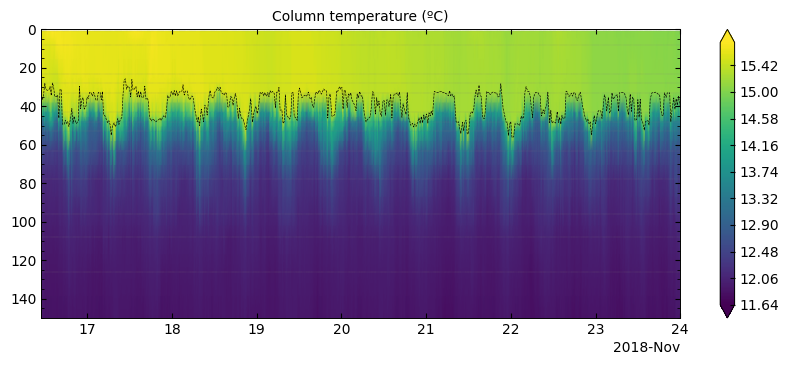

In [49]:
plot_column_temperature(data, df_ci, period=[None, date_1], ylims=[150, 0], save='column_end_november.jpg')

In [128]:
def plot_column_oscilation(column_coefs, component, mld_coef, delta05_coef, pos1, pos2, x_arrow):
    x = []
    ci = []
    depths = column_coefs.depths
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    
    mld_mean = mld_coef.attrs['mean']
    mld_ampl = mld_coef.loc[component]['A']
    delta_mean = delta05_coef.attrs['mean']

    delta_ampl = delta05_coef.loc[component]['A']
    for depth in depths:
        coef = getattr(column_coefs, 'd' + str(depth))
        value = coef.loc[component]['A']
        confidence = coef.loc[component]['A_ci']
        ci.append(confidence)
        x.append(value)
        
    fig, ax = plt.subplots()
    ax.scatter(x, depths)
    ax.errorbar(x, depths, xerr=ci, marker='o', linestyle='none', lw=0.8, capsize=3, c='k')
    ax.axhline(mld_mean, ls='--')
    ax.axhline(mld_mean + delta_mean, ls='--', c=colors[1])
    xlim = ax.get_xlim()
    ax.set_ylim(max(depths) + 2, min(depths) - 2)
    mld_mean_arr = np.full(2, mld_mean)
    plt.fill_between((xlim[0], xlim[1]), (mld_mean_arr-mld_ampl), (mld_mean_arr+mld_ampl), color=colors[0], alpha=0.35)
    plt.fill_between((xlim[0], xlim[1]), (mld_mean + delta_mean-delta_ampl), (mld_mean + delta_mean+delta_ampl), color=colors[1], alpha=0.35)

    ax.set_xlim(*xlim)
    ax.set_xlabel('Oscilation amplitude (ºC)')
    ax.set_ylabel('Depth')
    ax.set_title('Tidal component ' + component)
    ax.arrow(x = x_arrow, y = mld_mean - mld_ampl, dy=2*mld_ampl, dx=0, width=0.0008, length_includes_head=True, head_width=0.01, head_length=2, color='k')
    ax.arrow(x = x_arrow, y = mld_mean + mld_ampl, dy=-2*mld_ampl, dx=0, width=0.0008, length_includes_head=True, head_width=0.01, head_length=2, color='k')

    ax.arrow(x = x_arrow, y = mld_mean + delta_mean - delta_ampl, dy=2*delta_ampl, dx=0, width=0.0008, length_includes_head=True, head_width=0.01, head_length=2, color='k')
    ax.arrow(x = x_arrow, y = mld_mean + delta_mean + delta_ampl, dy=-2*delta_ampl, dx=0, width=0.0008, length_includes_head=True, head_width=0.01, head_length=2, color='k')
    ax.text(pos1[0], pos1[1], 'MLD oscilation amplitude', transform=ax.transAxes)
    ax.text(pos2[0], pos2[1], r'$\Delta_{0.05}$ oscilation amplitude', transform=ax.transAxes)
    
    plt.show()

In [51]:
mld_coef = coef_dataframe(df_ci['D1'], period=[None, date_1])
delta05_filtered = lowpass_filter(delta05_ci.x[None:date_1:1], delta05_ci[None:date_1:1].index, 1/5, 1/512)
nov_delta05ci = coef_dataframe(delta05_filtered, period=[None, date_1, 1])

NameError: name 'date_1' is not defined

In [105]:
a = column_coefs([28, 33, 43, 48, 53, 63, 78, 96])
a.compute(data, period=[None, date_1])

In [108]:
a.clean()

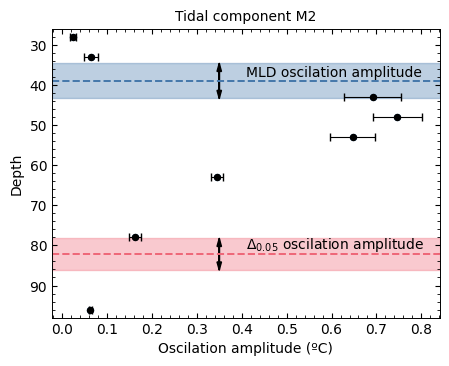

In [129]:
plot_column_oscilation(a, 'M2', nov_ci.D1, nov_delta05ci, pos1=[0.5, 0.835], pos2=[0.5, 0.24],x_arrow=0.35)

### Mareas internas principios de diciembre
Mayor amplitud que en noviembre > columna menos estratificada

In [187]:
date_2 = datetime(2018, 11, 30)
date_3 = datetime(2018, 12, 9)
dn = 1 # get datapoints every 60 seconds, not every 5
dec_ci = TidalComponentsFit.compute(df_ci, period=[date_2, date_3, dn])
dec_ci.clean()

dec_g05 = coef_dataframe(G05_ci.x, period=[date_2, date_3, dn])

In [186]:
dec_g05

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,66.029559,29.998881,0.006571,0.002351,209.316526,20.447930
K1,23.934470,18.144653,5.792385,0.003444,0.002805,102.947392,46.470183
2SK5,4.797373,6.170875,13.306140,0.002009,0.001079,229.740263,30.780755
2MK5,4.930880,3.238117,6.979273,0.001455,0.001080,15.051849,42.482741
M4,6.210301,2.797097,4.237835,0.001352,0.001288,0.078602,54.376228
M3,8.280401,2.302720,3.913570,0.001227,0.001216,323.452898,56.733577
M6,4.140200,0.893291,1.977993,0.000764,0.001065,200.311841,79.776834
M8,3.105150,0.273189,0.988028,0.000423,0.000833,310.306150,112.980163
3MK7,3.529641,0.150499,0.192011,0.000314,0.001403,162.554329,256.342819


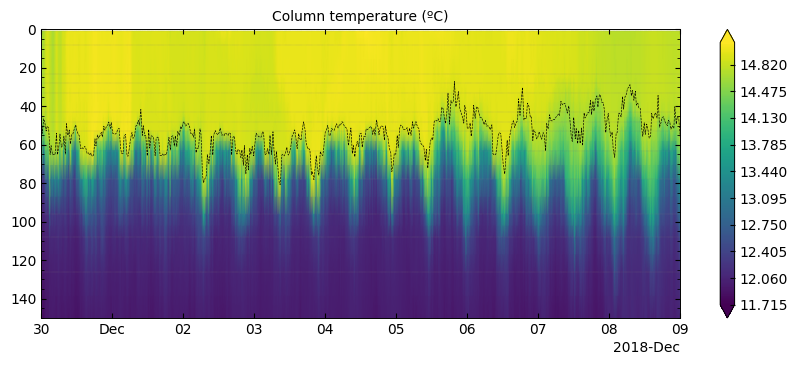

In [134]:
plot_column_temperature(data, df_ci, period=[date_2, date_3], ylims=[150, 0])

In [151]:
b = column_coefs([28, 33, 43, 48, 53, 63, 78, 96, 108])
b.compute(data, period=[date_2, date_3])
b.clean()

In [152]:
delta05_filtered = lowpass_filter(delta05_ci.x[date_2:date_3:1], delta05_ci[date_2:date_3:1].index, 1/5, 1/1024)
dec_delta05ci = coef_dataframe(delta05_filtered, period=[date_2, date_3, 1])

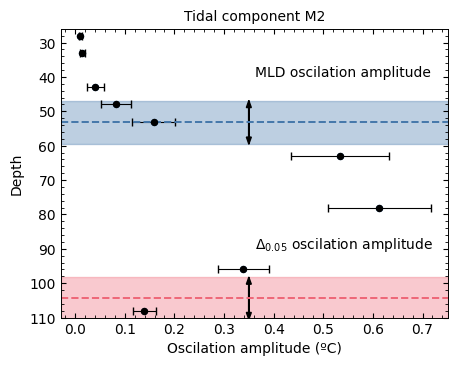

In [178]:
plot_column_oscilation(b, 'M2', dec_ci.D1, dec_delta05ci, pos1=[0.5, 0.835], pos2=[0.5, 0.24], x_arrow=0.35)

## January

In [69]:
date_6 = datetime(2019, 1, 5)
date_7 = datetime(2019, 1, 14) # o 14
dn = 1 # get datapoints every 60 seconds, not every 5
jan_ci = TidalComponentsFit.compute(df_ci, period=[date_6, date_7, dn])
jan_ci.clean()
jan_delta05 =  coef_dataframe(delta05_ci.x, period=[date_6, date_7, dn])
jan_g05 = coef_dataframe(G05_ci.x, period=[date_6, date_7, dn])

In [125]:
1/12

0.08333333333333333

In [174]:
jan_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,81.087080,214.759075,7.815364,1.045273,37.100553,7.652328
K1,23.934470,9.448694,4.127562,2.667837,2.573763,140.877514,55.323839
M4,6.210301,4.163415,13.437969,1.770917,0.946864,182.789965,30.543146
M3,8.280401,2.540387,8.962437,1.383322,0.905662,316.822371,37.506480
M6,4.140200,2.030744,9.410974,1.236804,0.790205,165.739202,36.577413


In [173]:
jan_g05

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,28.572421,5.599726,0.001611,0.001334,295.841741,47.608339
M3,8.280401,24.736773,11.903774,0.001499,0.000852,331.425221,32.510972
K1,23.934470,15.150774,2.776202,0.001173,0.001380,110.982880,67.183822
2MK5,4.930880,14.882807,9.645218,0.001163,0.000734,102.762983,36.169150
M4,6.210301,8.066601,5.618146,0.000856,0.000708,314.646760,47.380353
M6,4.140200,2.986353,0.792380,0.000521,0.001147,265.911263,126.271291
M8,3.105150,2.821792,3.136766,0.000506,0.000560,221.345213,63.407635
3MK7,3.529641,1.463443,1.610439,0.000365,0.000563,359.516717,88.554735
2SK5,4.797373,1.319037,0.854447,0.000346,0.000734,129.235072,121.465475


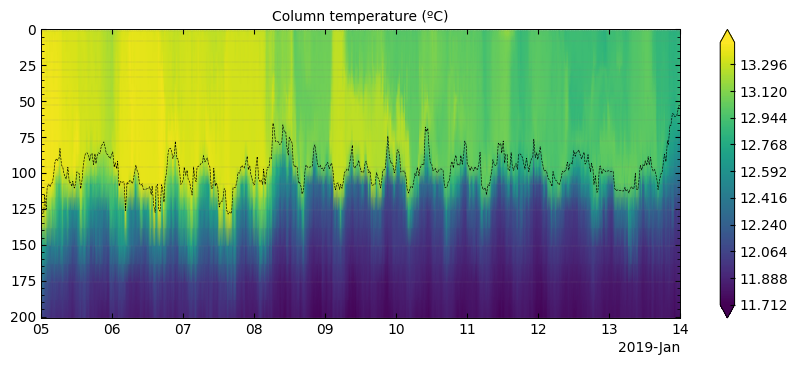

In [167]:
plot_column_temperature(data, df_ci, period=[date_6, date_7])

In [168]:
c = column_coefs([96, 108, 126, 151, 176])
c.compute(data, period=[date_6, date_7])
c.clean()

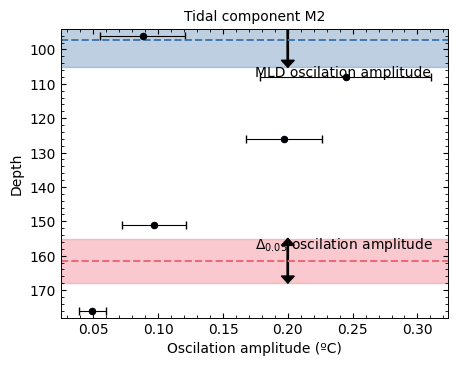

In [169]:
plot_column_oscilation(c, 'M2', jan_ci.D1, jan_delta05, pos1=[0.5, 0.835], pos2=[0.5, 0.24], x_arrow=0.2)

### FFT

In [16]:
complete_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,5.618951,39.174451,2.928870,0.917180,47.610279,17.941438
K1,23.934470,3.675320,18.264360,2.368754,1.086360,146.534635,26.281745
2Q1,28.006223,2.024010,10.056212,1.757837,1.086470,245.726421,35.412104
L2,12.191620,1.483654,10.344140,1.505008,0.917165,16.728448,34.916092
O1,25.819342,1.074583,5.341629,1.280832,1.086204,266.146244,48.612076


In [135]:
D1_ = df_ci['D1'][:date_1]
#D1_lowpass = lowpass_filter(D1_, 1/5, 1/512)

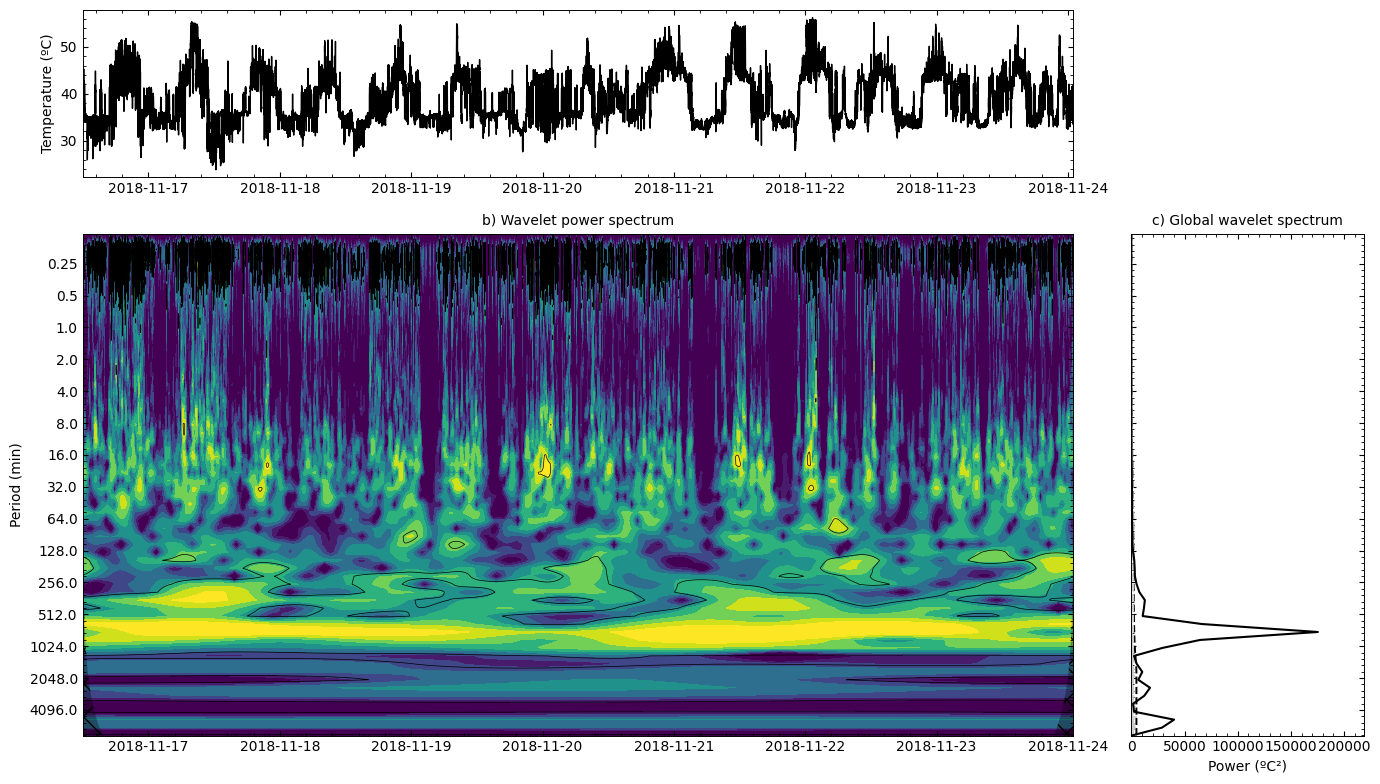

In [181]:
wavelet_power_spectrum(D1_, data.date, period=[None, date_1, 1])

In [284]:
D1_ = df_ci['D1']
freqs_D1, psd_D1, dof_D1 = windowed_spectrum(D1_, 5/60/60/24, 28, 3) #window 42.67

In [285]:
a2_ = df_ci['a2']
freqs_a2, psd_a2, dof_a2 = windowed_spectrum(a2_, 5/60/60/24, 28, 3) #window 42.67

In [286]:
freqs_G05, psd_G05, dof_G05 = windowed_spectrum(G05.x, 5/60/60/24, 28, 3) #window 42.67

In [383]:
temp_8 = data.temp[:, 8].data
freqs_temp_8, psd_temp_8, dof_temp_8 = windowed_spectrum(temp_8, 5/60/60/24, 28, 3) #window 42.673
temp_7 = data.temp[:, 7].data
freqs_temp_7, psd_temp_7, dof_temp_7 = windowed_spectrum(temp_7, 5/60/60/24, 28, 3) #window 42.67

temp_10 = data.temp[:, 10].data
freqs_temp_10, psd_temp_10, dof_temp_10 = windowed_spectrum(temp_10, 5/60/60/24, 28, 3) #window 42.67

temp_14 = data.temp[:, 14].data
freqs_temp_14, psd_temp_14, dof_temp_14 = windowed_spectrum(temp_14, 5/60/60/24, 28, 3) #window 42.67

temp_4 = data.temp[:, 4].data
freqs_temp_4, psd_temp_4, dof_temp_4 = windowed_spectrum(temp_4, 5/60/60/24, 28, 3) #window 42.67

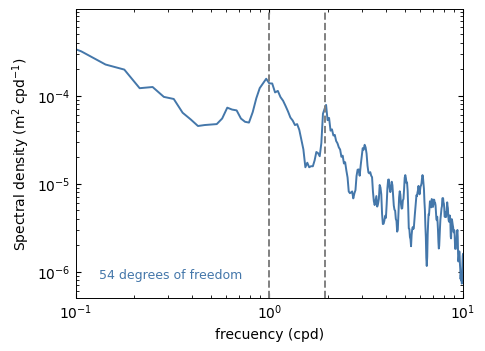

In [396]:
plot_spectrum(freqs_G05, psd_G05, dof_G05, 'cpd', 'm', vlines=[1, M2_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-7, None))

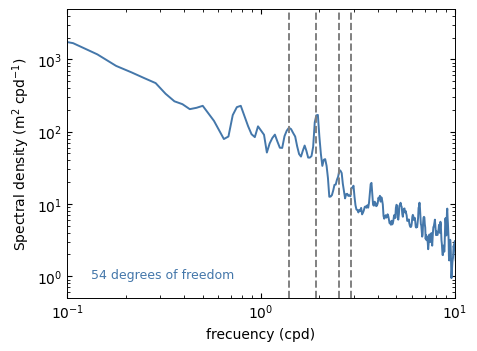

In [397]:
plot_spectrum(freqs_D1, psd_D1, dof_D1, 'cpd', 'm', vlines=[1*coriolis_freq_cpd, M2_cpd, M3_cpd, 1/9.5*24], 
              xlim=(10**-1, 10**1), ylim=(5*10**-1,None))

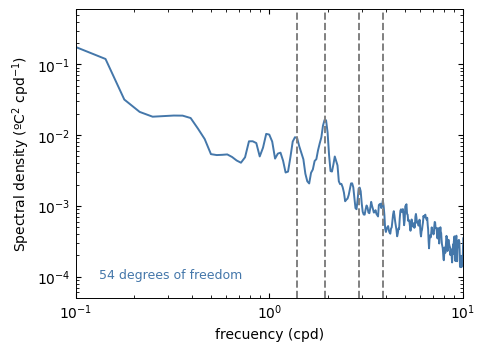

In [398]:
plot_spectrum(freqs_a2, psd_a2, dof_a2, 'cpd', 'ºC', vlines=[1*coriolis_freq_cpd, M2_cpd, M3_cpd, M4_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-5, None))

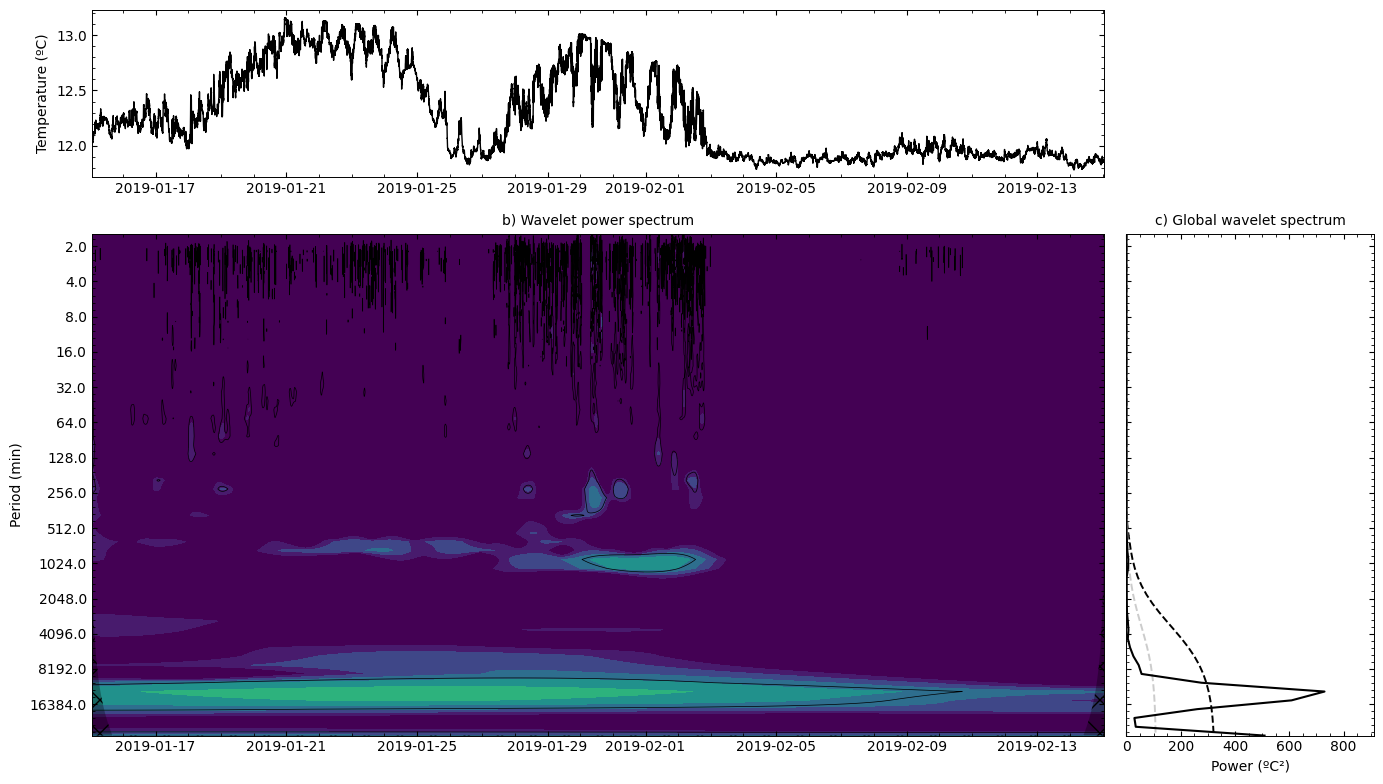

In [341]:
wavelet_power_spectrum(data.temp[:, 14], data.date, period=[datetime(2019, 1, 15), datetime(2019, 2, 15), 12])

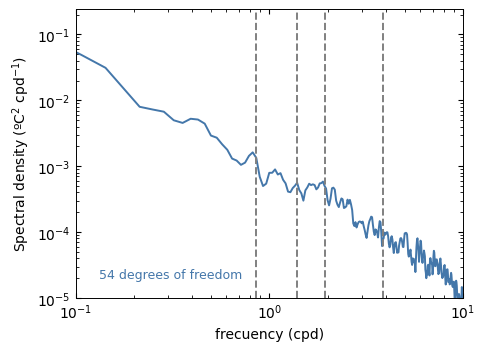

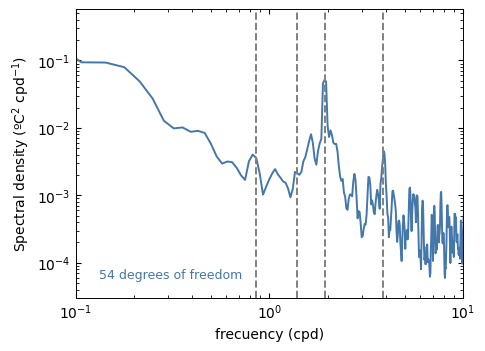

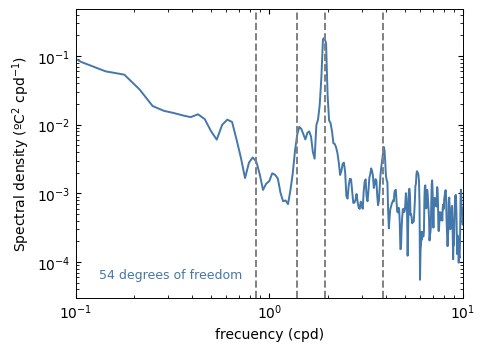

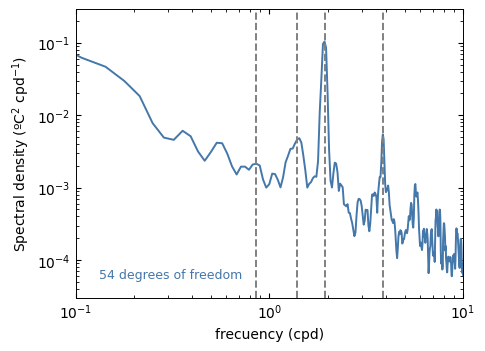

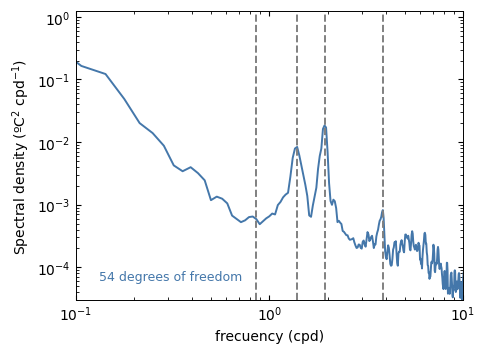

In [395]:
plot_spectrum(freqs_temp_4, psd_temp_4, dof_temp_4, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(1*10**-5, None))

plot_spectrum(freqs_temp_7, psd_temp_7, dof_temp_7, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_8, psd_temp_8, dof_temp_8, 'cpd', 'ºC', 
              
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_10, psd_temp_10, dof_temp_10, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_14, psd_temp_14, dof_temp_14, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))




In [349]:
1/14

0.07142857142857142

In [393]:
coriolis_frequency = 2*7.2921e-5*np.sin(np.deg2rad(data.lat.data)[0])
coriolis_freq_cps = coriolis_frequency/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24
M2_cpd = 1/12.42061*24
M4_cpd = 1/6.210301*24
K1_cpd = 1/23.934470*24
Q1_cpd = 1/28.006223*24
M3_cpd = 1/8.280401*24
M8_cpd = 1/3.105150*24
O1_cpd = 1/1/25.819351*24 # not present in temperature record
Q1_2_cpd = 1/28.006223*24